In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [4]:
# import some data to play with
iris = datasets.load_iris()

In [5]:
X = iris.data[:, :2]  
y = iris.target

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

C:\Users\Sush\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0,  9,  7],
       [ 0,  2,  7]], dtype=int64)

In [10]:

from matplotlib.colors import ListedColormap
X_set, y_set = X_train , y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01 ),
np.arange(start = X_set[:,1].min()-1, stop = X_set[:, 1].max() + 1, step = 0.010))

In [17]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green','blue')))

In [18]:
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(),X2.max())

(1.0, 5.3900000000000041)

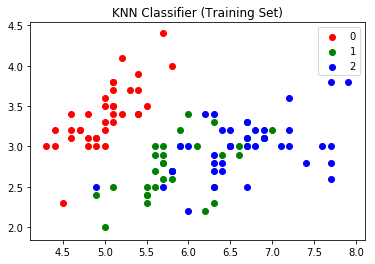

In [21]:

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
               c = ListedColormap(('red','green','blue'))(i),label = j)
plt.title('KNN Classifier (Training Set)')
plt.legend()
plt.show()

In [22]:

from matplotlib.colors import ListedColormap
X_set, y_set = X_test , y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01 ),
np.arange(start = X_set[:,1].min()-1, stop = X_set[:, 1].max() + 1, step = 0.010))

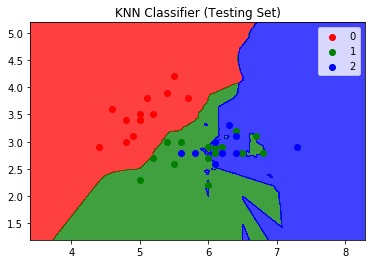

In [25]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
               c = ListedColormap(('red','green','blue'))(i),label = j)
plt.title('KNN Classifier (Testing Set)')
plt.legend()
plt.show()